In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from lcls_beamline_toolbox.xrayinteraction import damage
from lcls_beamline_toolbox.xraybeamline2d import beam1d_normal as beam
from lcls_beamline_toolbox.xraybeamline2d import optics1d_normal as optics
from lcls_beamline_toolbox.xraybeamline2d import beamline1d as beamline
import os
from scipy.optimize import curve_fit

<IPython.core.display.Javascript object>


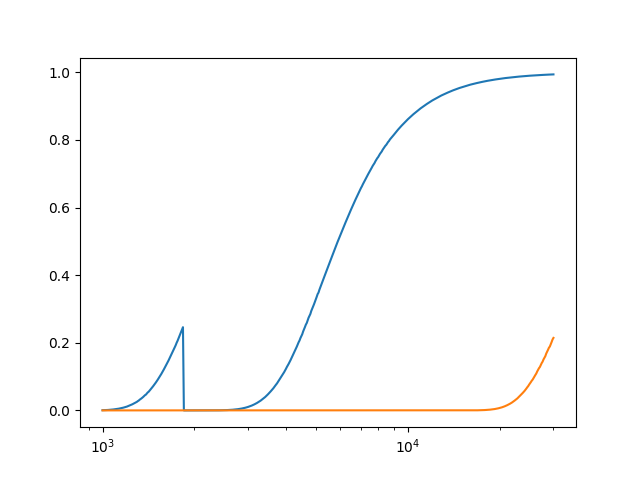

<IPython.core.display.Javascript object>


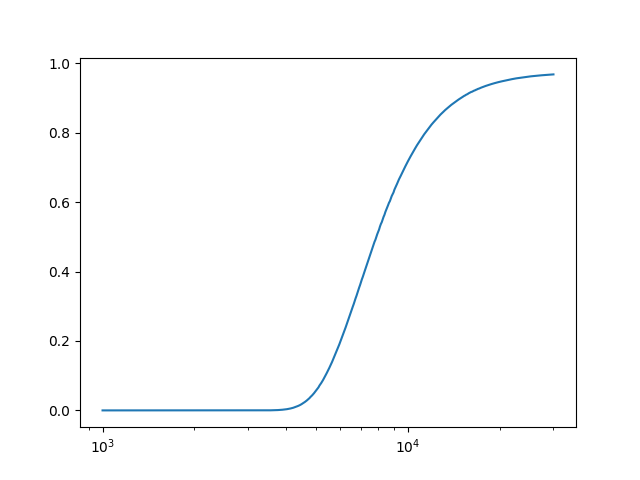

In [7]:
CVD_blade = damage.Device(name='CVD', material='CVD', range='HXR')

silicon_blade = damage.Device(name='AT2L0', material='Si', range='HXR')

T = silicon_blade.transmission(thickness=20e-6)
T2 = silicon_blade.transmission(thickness=5120e-6)
plt.figure()
plt.semilogx(silicon_blade.energy, T)
plt.semilogx(silicon_blade.energy, T2)

plt.figure()
plt.semilogx(CVD_blade.energy, CVD_blade.transmission(430e-6))

In [125]:
filename = '/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xrayinteraction/data/HXR_source.csv'

beam_data = np.genfromtxt(filename, delimiter=',', skip_header=1)
beam_photon_energy = beam_data[:,0]*1000
beam_source = beam_data[:,2]
# FWHM divergence (microrad converted to rad)
beam_fwhm_div = beam_data[:,3]*1e-6

wavelength = 1239.8/beam_photon_energy

source_fit = np.polyfit(np.flipud(wavelength), np.flipud(beam_source), 4)
div_fit = np.polyfit(np.flipud(wavelength), np.flipud(beam_fwhm_div), 4)

# energy = np.linspace(1000, 30000, 100)
wavelength2 = 1239.8/energy
wavelength2 = np.linspace(.04,2,100)

def fit_fun(x, a, b, c, d):
    f = a*np.exp(x*b)/x**c + d
    return f

def fit_fun2(x, a, b, c):
    f = a*1/x**b + c
#     f = a*np.exp(-(x/c))
    return f

p_source, pcov = curve_fit(fit_fun, wavelength, beam_source)

p_div, pcov = curve_fit(fit_fun2, beam_photon_energy, beam_fwhm_div)
print(p_source)
print(p_div)

energy = np.linspace(500,30000,100)

[  8.57997974   0.98323435   0.56971548 -82.0711769 ]
[ 2.75210087e-03  7.46474978e-01 -3.97863593e-07]


<IPython.core.display.Javascript object>


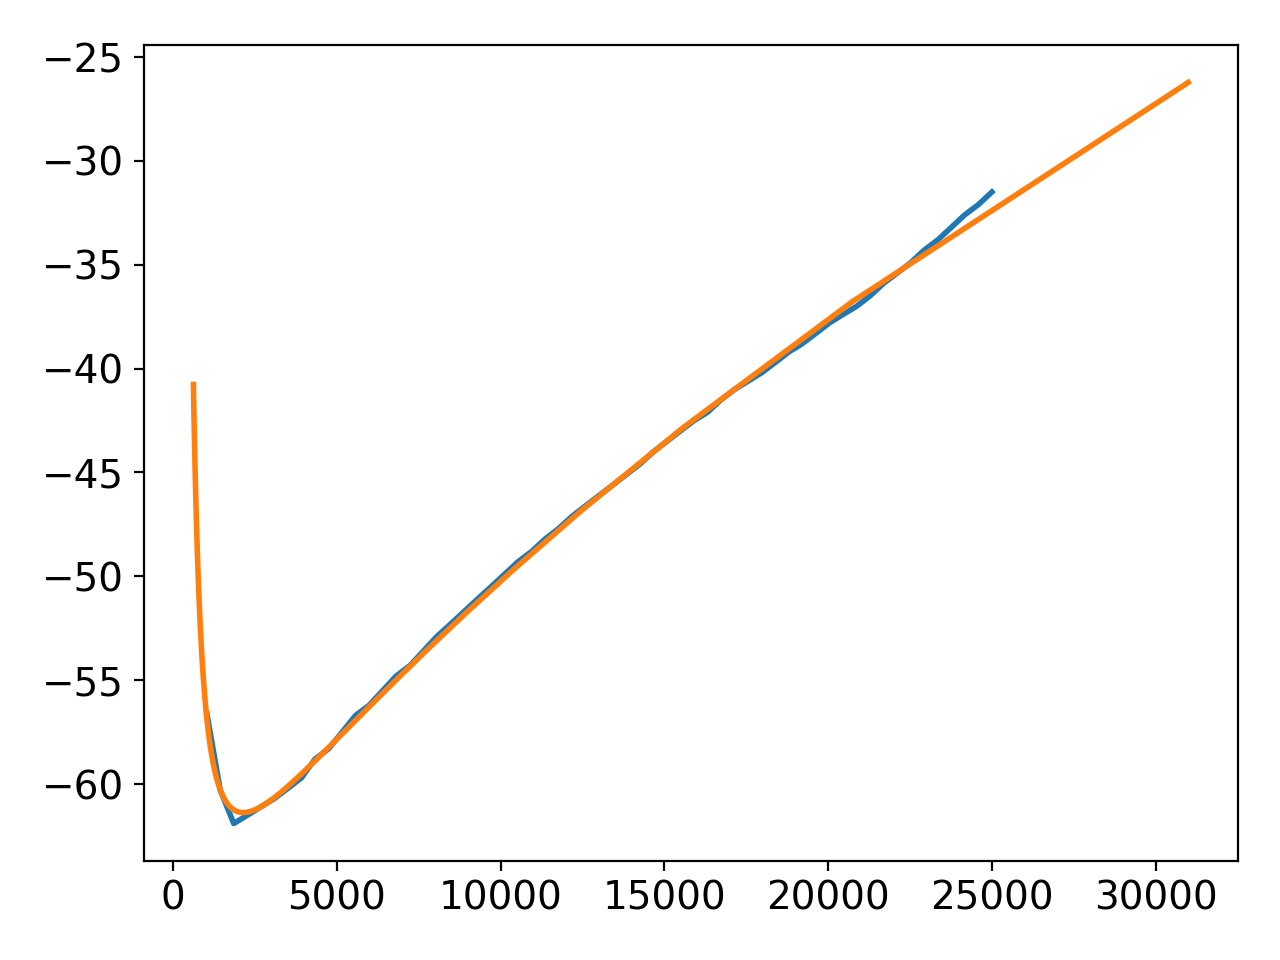

<IPython.core.display.Javascript object>


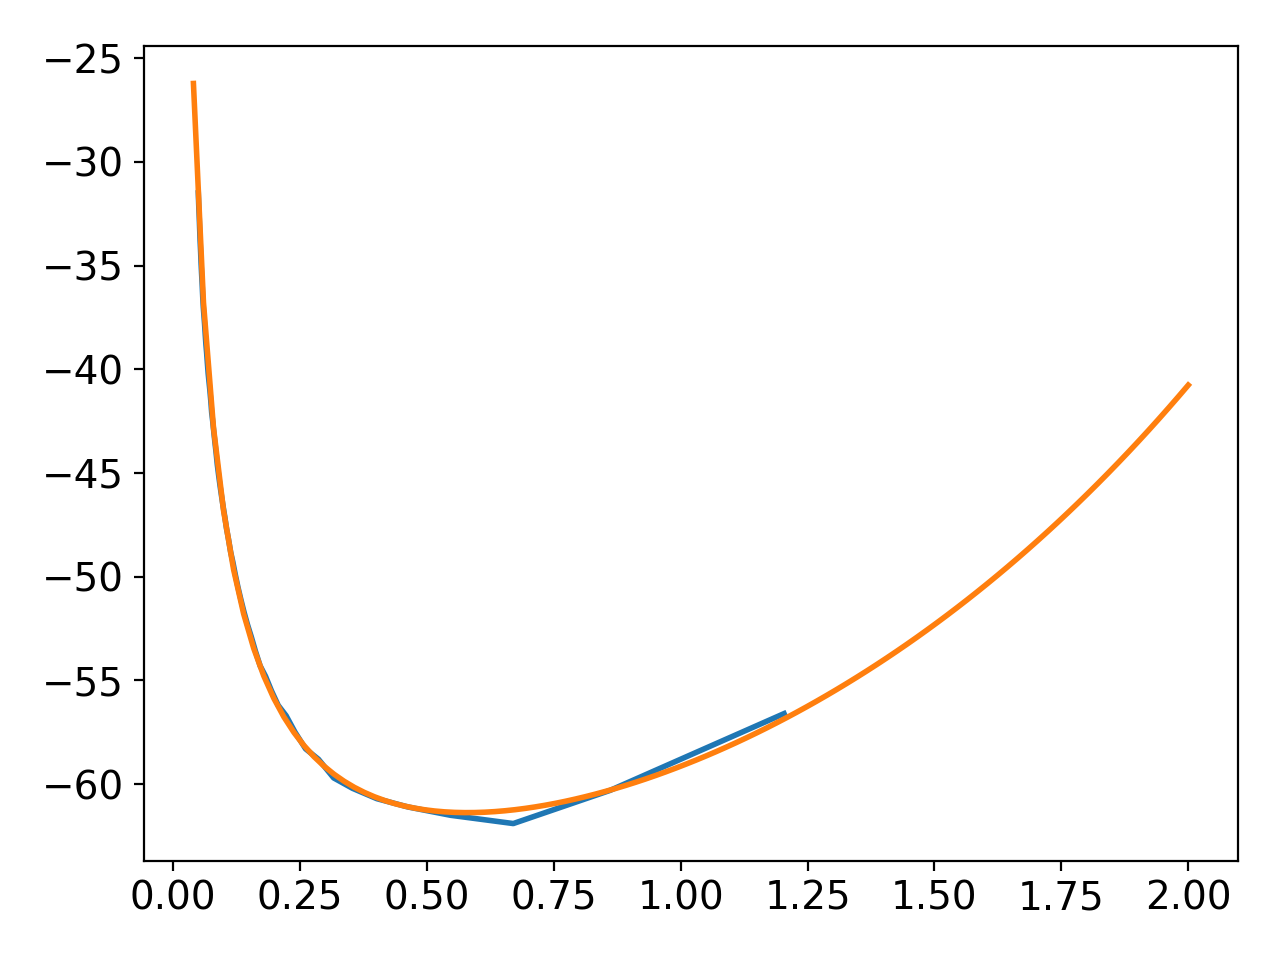

<IPython.core.display.Javascript object>


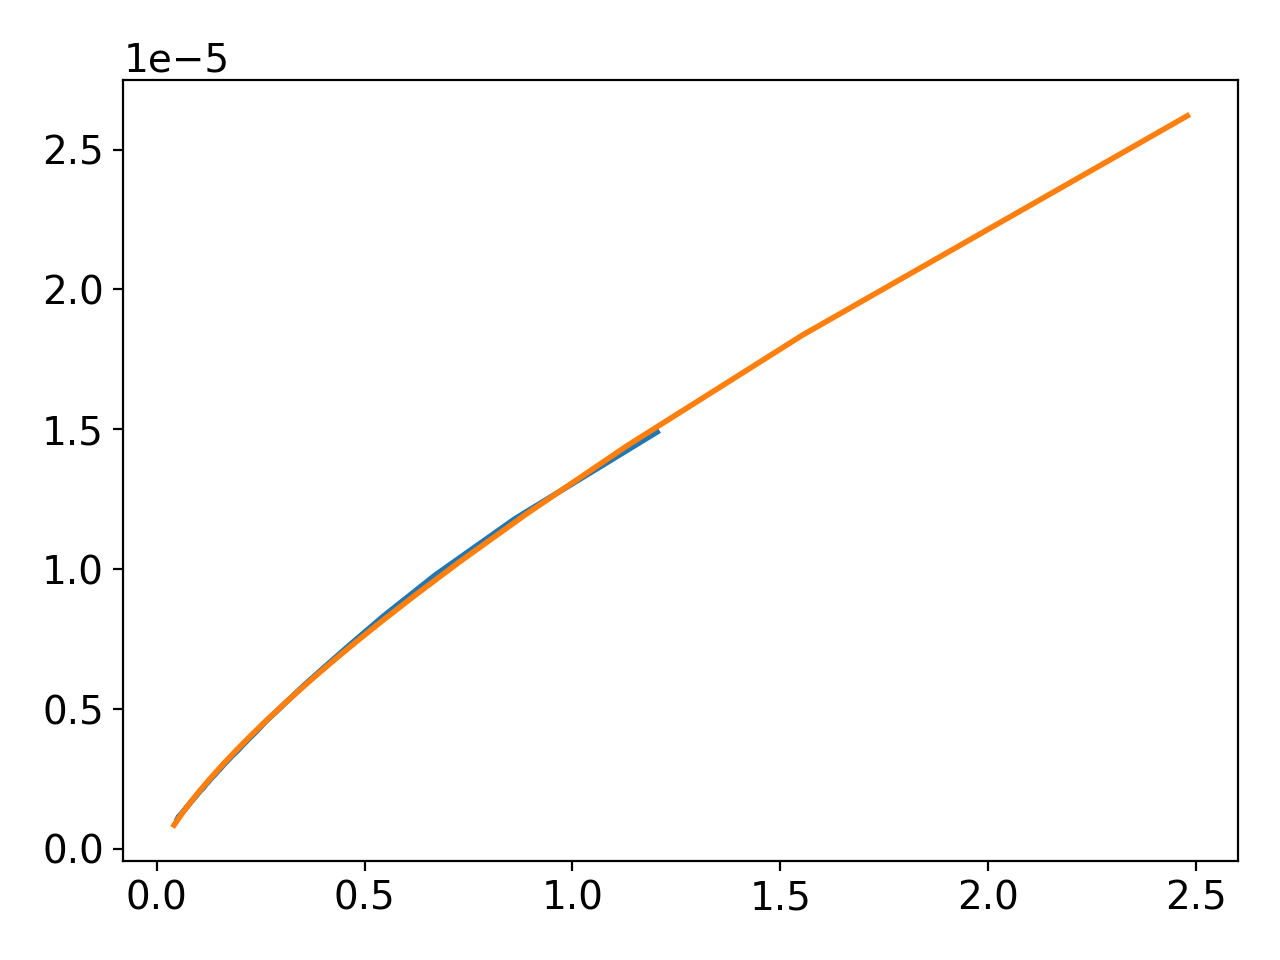

<IPython.core.display.Javascript object>


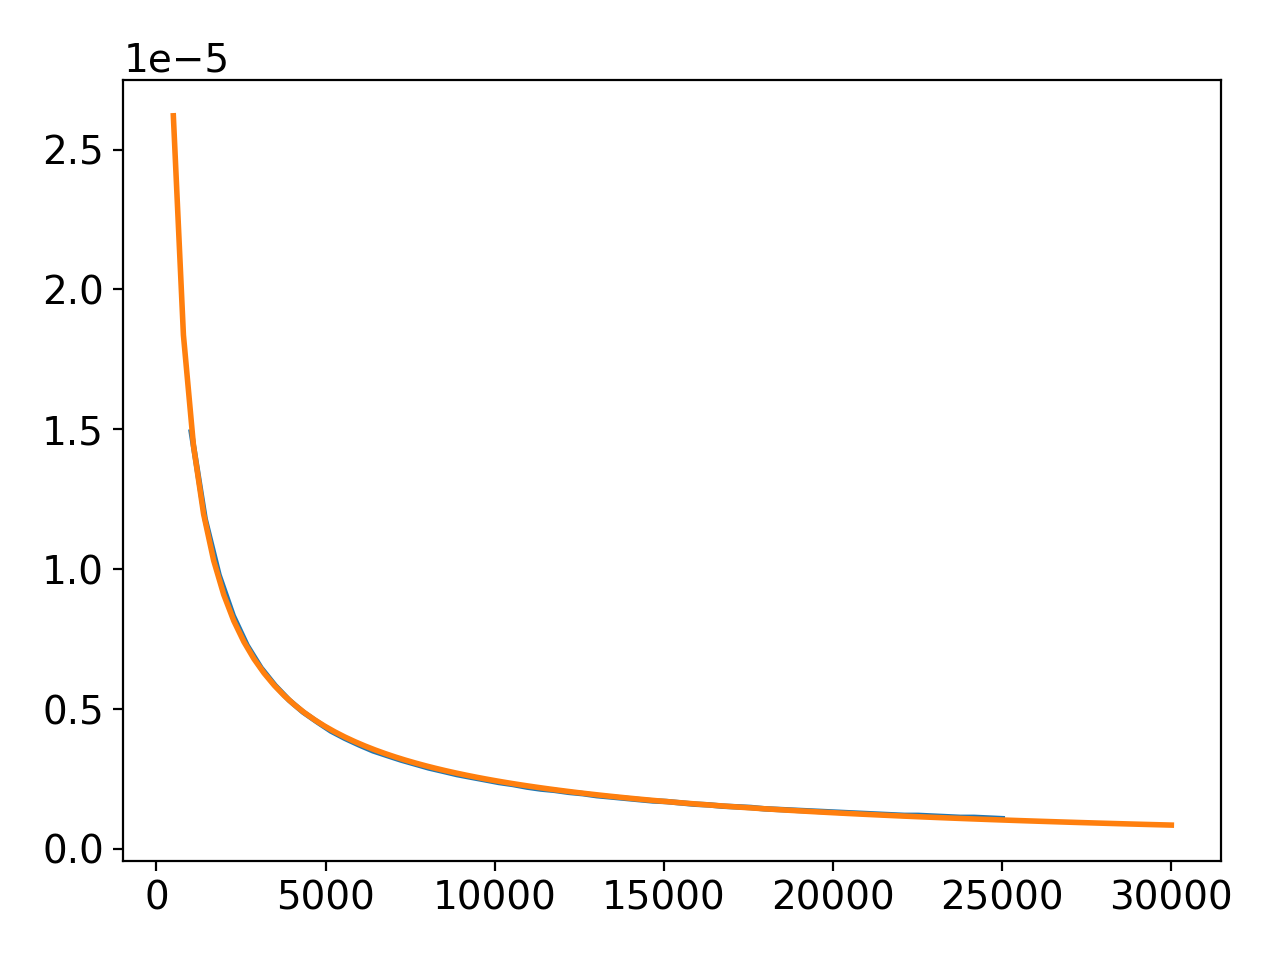

In [126]:
plt.figure()
plt.plot(beam_photon_energy, beam_source)
plt.plot(1239.8/wavelength2, fit_fun(wavelength2, p_source[0], p_source[1], p_source[2], p_source[3]))

plt.figure()
plt.plot(wavelength, beam_source)
# plt.plot(wavelength2, np.polyval(source_fit, wavelength2))
plt.plot(wavelength2, fit_fun(wavelength2, p_source[0], p_source[1], p_source[2], p_source[3]))
plt.figure()
plt.plot(wavelength, beam_fwhm_div)
# plt.plot(wavelength2, np.polyval(div_fit, wavelength2))
plt.plot(1239.8/energy, fit_fun2(energy, p_div[0], p_div[1], p_div[2]))

plt.figure()
plt.plot(beam_photon_energy, beam_fwhm_div)
plt.plot(energy, fit_fun2(energy, p_div[0], p_div[1], p_div[2]))